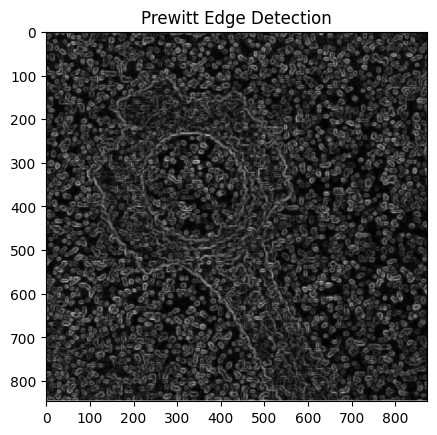

In [36]:
# PREWITT EDGE DETECTION WITHOUT THRESHOLDING
# first converted image into grey_scale then padded a image created a function in which first defime dimensions of image as x and y coordinate
#Then define a kernel for prewitt edge detection. I created an aaray of zeroes of the same size as that of an original image. I run a loop till
# dimension of image minus 2 so, kernel get cover whole image. then multiply the kernel with the image to as the same size of kernel by 
#extracting image pixels from i to i+3 and j to j+3 so we get a 3*3 pixel of image which first multiply with corresponding value of kernel and then sum up.
# did for both horizontal and vertical edge detection and then find out the magnitude.Then replaces the output with the i,j cordinate in the zero
#array of image size. use np.clip to keep the pixel size between 0 and 255 and then convert image array to image itself.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = cv2.imread(r"original_image.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

pad_img = np.pad(img, 1, mode='constant', constant_values=0)

def prewitt(pad_img):
    y_cor = pad_img.shape[0]
    x_cor = pad_img.shape[1]
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    output = np.zeros((y_cor-2, x_cor-2)) 

    for i in range(y_cor-2): 
        for j in range(x_cor-2):
            gx = np.sum(kernel_x * pad_img[i:i+3, j:j+3])
            gy = np.sum(kernel_y * pad_img[i:i+3, j:j+3])
            output[i, j] = np.sqrt(gx**2 + gy**2)  

    return np.clip(output, 0, 255).astype(np.uint8) 

prewitt_filtered = Image.fromarray(prewitt(pad_img))  
prewitt_filtered.save("prewitt.jpg")
testimage = plt.imread("prewitt.jpg")  
plt.imshow(testimage, cmap="gray") 
plt.title("Prewitt Edge Detection")
plt.show()


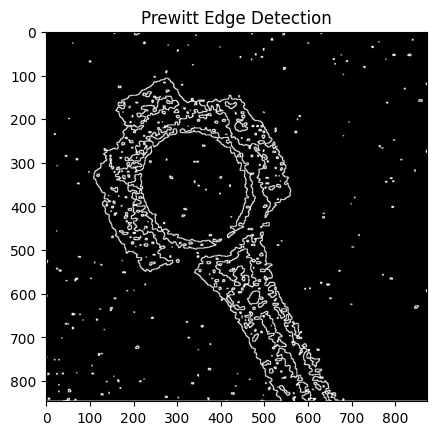

In [32]:
## prewitt edge detection after thresholding(Here i just applied binary thresholding before appying prewitt)
threshold_value = 128 
img[img < threshold_value] = 0
img[img >= threshold_value] = 255


prewitt_filtered = Image.fromarray(prewitt(pad_img))  

prewitt_filtered.save("prewitt_thresholded.jpg")
testimage = plt.imread("prewitt_thresholded.jpg")  
plt.imshow(testimage, cmap="gray") 
plt.title("Prewitt Edge Detection")
plt.show()


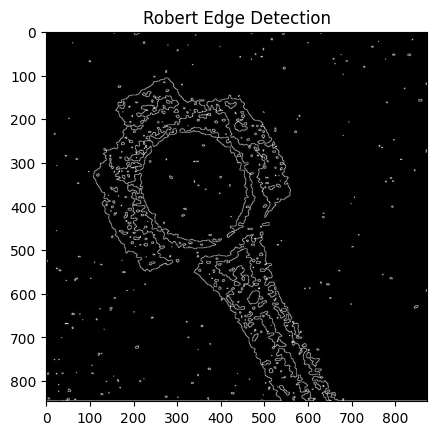

In [24]:
## robert edge detection(For robert also the main idea is same as that of prewitt but here since we are using 2*2 kernel so i move kernel
# from dimension of image to -1(the loop) and took out the image of dimension 2*2 to multiply with kernel)
threshold_value = 128
img[img < threshold_value] = 0
img[img >= threshold_value] = 255

pad_img = np.pad(img, 1, mode='constant', constant_values=0)

y_cor = pad_img.shape[0]
x_cor = pad_img.shape[1]
kernel_x = np.array([[1, 0], [0, -1]])  
kernel_y = np.array([[0, 1], [-1, 0]]) 


for i in range(y_cor - 1): 
    for j in range(x_cor - 1):
        gx = np.sum(kernel_x * pad_img[i:i+2, j:j+2])
        gy = np.sum(kernel_y * pad_img[i:i+2, j:j+2])
        magnitude = np.sqrt(gx**2 + gy**2)

        pad_img[i, j] = np.clip(magnitude, 0, 255)

robert_filtered = Image.fromarray(pad_img[1:-1, 1:-1]) 
robert_filtered.save("robert.jpg")

testimage = plt.imread("robert.jpg")
plt.imshow(testimage, cmap="gray")
plt.title("Robert Edge Detection")
plt.show()


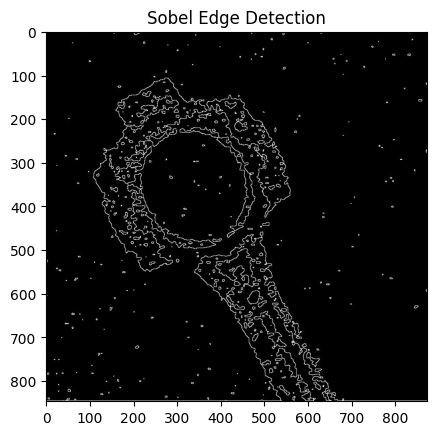

In [26]:
##sobel edge detection:(same logic as that of prewitt except their is a change in kernel)


def sobel(pad_img):
    y_cor = pad_img.shape[0]
    x_cor = pad_img.shape[1]
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) 
    
    output = np.zeros((y_cor-2, x_cor-2)) 

    for i in range(y_cor-2): 
        for j in range(x_cor-2):
            gx = np.sum(kernel_x * pad_img[i:i+3, j:j+3])
            gy = np.sum(kernel_y * pad_img[i:i+3, j:j+3])
            output[i, j] = np.sqrt(gx**2 + gy**2) 

    return np.clip(output, 0, 255).astype(np.uint8) 

sobel_filtered = Image.fromarray(pad_img[1:-1, 1:-1]) 
sobel_filtered.save("sobel.jpg")

testimage = plt.imread("sobel.jpg")
plt.imshow(testimage, cmap="gray")
plt.title("Sobel Edge Detection")
plt.show()


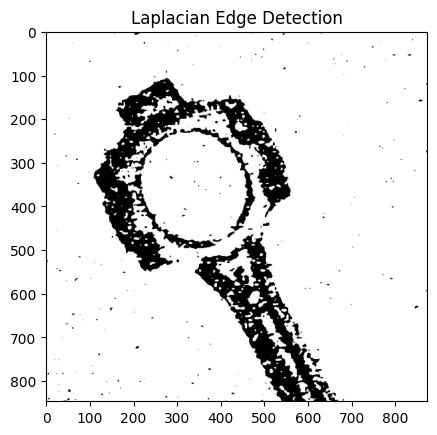

In [37]:
### laplacian edge detection: (same logic just the different kernel)
threshold_value = 128
img[img < threshold_value] = 0
img[img >= threshold_value] = 255

pad_img = np.pad(img, 1, mode='constant', constant_values=0)

def laplacian(pad_image):
    laplacian_kernel = np.array([[1, 4, 1],
                              [4, -20, 4],
                              [1, 4, 1]])
    y_cor = pad_img.shape[0]
    x_cor = pad_img.shape[1]

    for i in range(1, y_cor - 1): 
        for j in range(1, x_cor - 1):
            response = np.sum(laplacian_kernel * pad_img[i-1:i+2, j-1:j+2])
            pad_img[i, j] = np.clip(response, 0, 255)
    return pad_image        


laplacian_filtered = Image.fromarray(pad_img[1:-1, 1:-1])
laplacian_filtered.save("laplacian.jpg")


testimage = plt.imread("laplacian.jpg")
plt.imshow(testimage, cmap="gray")
plt.title("Laplacian Edge Detection")
plt.show()


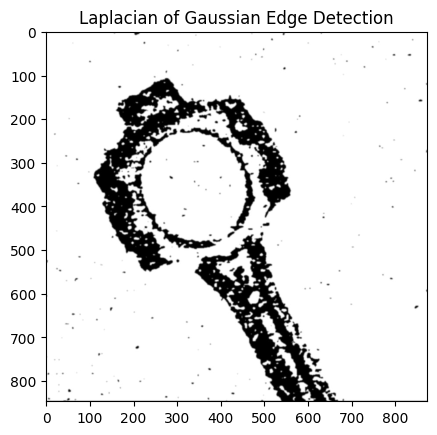

In [38]:
## guassian-laplacian(Here first i applied gaussian filter to smooothen the image ans then i called the laplacian edge detection which i made above)
pad_img = np.pad(img, 2, mode='constant', constant_values=0)

gaussian_kernel = (1/273) * np.array([[1, 4, 7, 4, 1],
                                      [4, 16, 26, 16, 4],
                                      [7, 26, 41, 26, 7],
                                      [4, 16, 26, 16, 4],
                                      [1, 4, 7, 4, 1]])
smoothed_img = pad_img.copy()
y_cor, x_cor = pad_img.shape
for i in range(2, y_cor - 2):
    for j in range(2, x_cor - 2):
        smoothed_img[i, j] = np.sum(gaussian_kernel * pad_img[i-2:i+3, j-2:j+3])

laplacian(smoothed_img)
        
log_filtered = Image.fromarray(smoothed_img[2:-2, 2:-2])  
log_filtered.save("log.jpg")

testimage = plt.imread("log.jpg")
plt.imshow(testimage, cmap="gray")
plt.title("Laplacian of Gaussian Edge Detection")
plt.show()


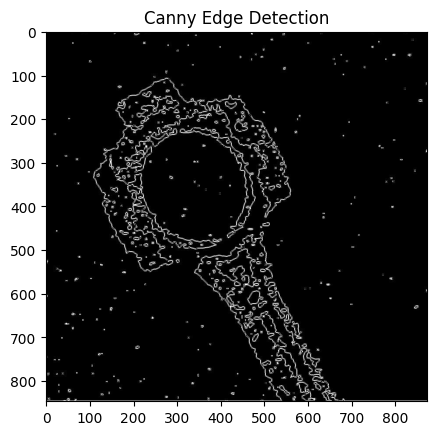

In [46]:
threshold_value = 128
img[img < threshold_value] = 0
img[img >= threshold_value] = 255

pad_img = np.pad(img, 1, mode='constant', constant_values=0)


sobel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

y_cor, x_cor = pad_img.shape
gradient_magnitude = np.zeros_like(pad_img)

for i in range(1, y_cor - 1):
    for j in range(1, x_cor - 1):
        gx = np.sum(sobel_x * pad_img[i-1:i+2, j-1:j+2])
        gy = np.sum(sobel_y * pad_img[i-1:i+2, j-1:j+2])
        gradient_magnitude[i, j] = np.sqrt(gx**2 + gy**2)


low_threshold = 50
high_threshold = 100
edges = np.where(gradient_magnitude > high_threshold, 255, 0)

canny_filtered = Image.fromarray(edges[1:-1, 1:-1].astype(np.uint8)) 
canny_filtered.save("canny.jpg")


testimage = plt.imread("canny.jpg")
plt.imshow(testimage, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()